# Perkenalan

**Nama: Muhamad Fikri Mumtaz**

**Batch: HCK-004**

----

**Problem Statement**

Memprediksi Kemungkinan Pengguna Kartu Kredit Bank Gagal Bayar (`Default`) Pada Bulan Berikutnya dengan menggunakan Pemodelan *`Supervised Machine Learning`*.

**Poin Penjabaran:**

- Berapakah limit balance pada setiap kategori Default Payment?

- Berapakah jumlah Default Payment berdasarkan status pernikahan?

- Berapa banyak jumlah dari tiap kategori Default Payment?

- Bagaimana persebaran distribusi umur berdasarkan Default Payment?

- Berapakah jumlah Default Payment berdasarkan Jenis Kelamin?

- Berapakah jumlah total tagihan berdasarkan payment delay (pay_0-pay_6)?

- Berapakah jumlah total pembayaran tagihan berdasrkan payment delay?

- Berapakah jumlah limit balance berdasrkan payment delay?

----

# Data Query

```
SELECT 
limit_balance,
CAST(sex AS INT64) as sex,
CAST(education_level AS INT64) as education_level,
CAST(marital_status AS INT64) as marital_status,
age,
pay_0,
pay_2,
pay_3,
pay_4,
CAST(pay_5 AS FLOAT64) as pay_5,
CAST(pay_6 AS FLOAT64) as pay_6,
bill_amt_1,
bill_amt_2,
bill_amt_3,
bill_amt_4,
bill_amt_5,
bill_amt_6,
pay_amt_1,
pay_amt_2,
pay_amt_3,
pay_amt_4,
pay_amt_5,
pay_amt_6,
CAST(default_payment_next_month AS INT64) as default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default`
LIMIT 7996
```

----

# Data Libraries

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# For Feature Selection
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor

#For Encoding
from sklearn.preprocessing import OrdinalEncoder

# For Classification Problems
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Evaluate classification Models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer, recall_score

# For Making Pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.over_sampling import SMOTE

# For using GridSearch
from sklearn.model_selection import GridSearchCV
#save model
import joblib

----

# Data Loading

In [110]:
# Cek Missing Value Non Standar
missing_values = ["n/a", "na", "--",'n/a','NaN','?']
df = pd.read_csv(r'D:\Hacktiv8\Milestone\Milestone 2\h8dsft_P1M1_Muhamad_Fikri_Mumtaz.csv',na_values = missing_values)

In [111]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [112]:
df.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,0.0,61454.0,61808.0,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,0.0,49221.0,49599.0,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,0.0,19568.0,19420.0,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,0.0,18457.0,22815.0,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,0.0,159919.0,68686.0,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
5,300000.0,2,4,2,32.0,0.0,0.0,0.0,0.0,0.0,-1.0,54053.0,65235.0,64747.0,65150.0,-450.0,700.0,15235.0,1491.0,1303.0,0.0,2000.0,1400.0,0
6,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,0.0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
7,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,0.0,192461.0,195970.0,122214.0,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
8,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,0.0,133598.0,167378.0,171106.0,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
9,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,0.0,160879.0,161797.0,165107.0,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0


In [113]:
df.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,1968.0,459.0,2500.0,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0
2956,100000.0,1,3,1,40.0,0.0,0.0,-1.0,-1.0,-2.0,-2.0,12878.0,7702.0,2377.0,0.0,0.0,0.0,2000.0,2377.0,40000.0,0.0,0.0,0.0,0
2957,30000.0,2,3,1,48.0,1.0,-1.0,-1.0,-2.0,-2.0,-2.0,-100.0,100.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0
2958,80000.0,2,3,1,39.0,-1.0,-1.0,-1.0,-1.0,-2.0,-1.0,5280.0,5000.0,5000.0,0.0,0.0,5000.0,5000.0,5000.0,0.0,5000.0,5000.0,470.0,0
2959,20000.0,1,3,2,26.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,96.0,780.0,0.0,0.0,0.0,0.0,1560.0,0.0,0.0,0.0,0.0,0.0,0
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,4280.0,2800.0,0.0,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,752.0,300.0,5880.0,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,1473.0,390.0,390.0,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0
2964,290000.0,2,2,1,39.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,-70.0,9540.0,390.0,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0,0


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

In [115]:
df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

In [116]:
print (df.isnull().values.any())

False


Terlihat bahwa data tidak terdapat missing value standar maupun non standard.

In [117]:
df.duplicated().sum()

1

In [118]:
df = df.drop_duplicates()

----

In [119]:
df.limit_balance.mean()

163356.95006747637

***`Limit Balance`*** merupakan batasan jumlah kredit uang yang diberikan oleh bank baik kepada individu maupun kepada keluarga pemegang kartu kredit.

In [120]:
df.sex.value_counts()

2    1801
1    1163
Name: sex, dtype: int64

***`Sex`*** merupakan jenis kelamin dengan 1 merupakan laki-laki (Male) dan 2 adalah wanita (Female).

In [121]:
df.marital_status.value_counts()

2    1594
1    1331
3      35
0       4
Name: marital_status, dtype: int64

***`Marital Status`*** adalah status pernikahan pada pengguna kredit bank dimana:

`1` adalah Nikah (*Married*)

`2` adalah Belum Menikah (*Single*)

`3` adalah Lainnya (*Others*)

In [122]:
df['marital_status'] = np.where((df.marital_status == 0),3,df.marital_status).astype('int64') 

Terdapat status marital_status dengan angka 0 yang dimana tidak ada keterangan untuk angka tersebut. Oleh karena itu, kita masukkan data tersebut ke status nomor 3 atau dengan status marital adalah lainnya.

In [123]:
df.marital_status.value_counts()

2    1594
1    1331
3      39
Name: marital_status, dtype: int64

In [124]:
df.education_level.value_counts()

2    1400
1    1038
3     483
5      24
4      13
6       4
0       2
Name: education_level, dtype: int64

***`Education Level`*** adalah tingkatan akademik terakhir pengguna kartu kredit yang tercatat pada sistem dimana:

`1` adalah lulusan sekolah menengah kebawah (**SD/SMP**)

`2` adalah lulusan sarjana (**Sarjana/Magister/Doktoral**)

`3` adalah lulusan sekolah menengah atas (**SMA**)

`4` adalah lulusan sekolah lainnya.

In [125]:
df['education_level'] = np.where((df.education_level == 0),4,df.education_level).astype('int64')
df['education_level'] = np.where((df.education_level == 5),4,df.education_level).astype('int64')
df['education_level'] = np.where((df.education_level == 6),4,df.education_level).astype('int64')

In [126]:
df.education_level.value_counts()

2    1400
1    1038
3     483
4      43
Name: education_level, dtype: int64

Terdapat status education_level dengan angka 0, 5, dan 6 yang dimana tidak terdapat keterangan untuk angka tersebut. Oleh karena itu, kita masukkan data tersebut ke status nomor 4 atau dengan keterangan adalah lulusan sekolah lainnya (*`Others`*).

In [127]:
df.pay_0.value_counts()

 0.0    1516
-1.0     540
 1.0     355
 2.0     262
-2.0     247
 3.0      29
 4.0       7
 8.0       3
 5.0       2
 7.0       2
 6.0       1
Name: pay_0, dtype: int64

In [128]:
df.pay_2.value_counts()

 0.0    1607
-1.0     580
 2.0     374
-2.0     352
 3.0      32
 4.0       8
 1.0       4
 7.0       3
 5.0       2
 6.0       2
Name: pay_2, dtype: int64

In [129]:
df.pay_3.value_counts()

 0.0    1610
-1.0     580
 2.0     368
-2.0     366
 3.0      22
 4.0       8
 6.0       4
 5.0       3
 7.0       3
Name: pay_3, dtype: int64

In [130]:
df.pay_4.value_counts()

 0.0    1667
-1.0     532
-2.0     407
 2.0     324
 3.0      14
 4.0       7
 7.0       6
 5.0       5
 6.0       1
 8.0       1
Name: pay_4, dtype: int64

In [131]:
df.pay_5.value_counts()

 0.0    1702
-1.0     504
-2.0     440
 2.0     280
 3.0      19
 4.0       9
 7.0       7
 5.0       2
 6.0       1
Name: pay_5, dtype: int64

In [132]:
df.pay_6.value_counts()

 0.0    1626
-1.0     540
-2.0     469
 2.0     297
 3.0      21
 7.0       6
 6.0       3
 4.0       2
Name: pay_6, dtype: int64

Kategori pay dapat diinterpretasikan sebagai berikut:

`-2` : adalah kategori pengguna kartu kredit yang membayar cicilan kredit perbulannya melebihi batas minimal yang harus dibayarkan pada bulan tersebut dan memiliki track record peminjaman credit yang tidak besar atau tidak aktif dalam melakukan peminjaman kredit bank pada bulan tersebut dengan tidak memiliki tagihan yang harus dibayarkan pada bulan tersebut.

`-1` : adalah kategori pengguna kartu kredit yang membayar cicilan kredit perbulannya melebihi batas minimal yang harus dibayarkan pada bulan tersebut dan memiliki track record peminjaman credit yang tidak besar.

`0` : adalah kategori pengguna kartu kredit yang telah membayar batas minimal cicilan kredit perbulannya.

`1` : adalah kategori pengguna kartu kredit yang tidak bisa membayar batas minimal cicilan kredit perbulannya dan dinyatakan default pada bulan tersebut.

`2` : adalah kategori pengguna kartu kredit yang tidak bisa membayar batas minimal cicilan kredit perbulannya dan dinyatakan default pada bulan tersebut dan 1 bulan sebelumnya.

`3` : adalah kategori pengguna kartu kredit yang tidak bisa membayar batas minimal cicilan kredit perbulannya dan dinyatakan default pada bulan tersebut dan 2 bulan sebelumnya.

`4` : adalah kategori pengguna kartu kredit yang tidak bisa membayar batas minimal cicilan kredit perbulannya dan dinyatakan default pada bulan tersebut dan 3 bulan sebelumnya.

`5` : adalah kategori pengguna kartu kredit yang tidak bisa membayar batas minimal cicilan kredit perbulannya dan dinyatakan default pada bulan tersebut dan 4 bulan sebelumnya.

`6` : adalah kategori pengguna kartu kredit yang tidak bisa membayar batas minimal cicilan kredit perbulannya dan dinyatakan default pada bulan tersebut dan 5 bulan sebelumnya.

`7` : adalah kategori pengguna kartu kredit yang tidak bisa membayar batas minimal cicilan kredit perbulannya dan dinyatakan default pada bulan tersebut dan 6 bulan sebelumnya.

`8` : adalah kategori pengguna kartu kredit yang tidak bisa membayar batas minimal cicilan kredit perbulannya dan dinyatakan default pada bulan tersebut dan 7 bulan sebelumnya.

Untuk mempermudah analisis, akan dilakukan penggeseran ulang kolom.

In [133]:
df1 = df.loc[:, ['sex', 'education_level', 'marital_status', 'age', 'limit_balance', 'pay_6', 'bill_amt_6', 'pay_amt_6', 'pay_5', 'bill_amt_5', 'pay_amt_5', 'pay_4', 'bill_amt_4', 'pay_amt_4', 'pay_3', 'bill_amt_3', 'pay_amt_3', 'pay_2', 'bill_amt_2', 'pay_amt_2', 'pay_0', 'bill_amt_1', 'pay_amt_1', 'default_payment_next_month']]

In [134]:
df1.head(10)

,sex,education_level,marital_status,age,limit_balance,pay_6,bill_amt_6,pay_amt_6,pay_5,bill_amt_5,pay_amt_5,pay_4,bill_amt_4,pay_amt_4,pay_3,bill_amt_3,pay_amt_3,pay_2,bill_amt_2,pay_amt_2,pay_0,bill_amt_1,pay_amt_1,default_payment_next_month
0,1,4,1,54.0,80000.0,0.0,17643.0,348.0,0.0,26210.0,542.0,0.0,29296.0,2232.0,0.0,62290.0,1336.0,0.0,61808.0,2208.0,0.0,61454.0,2545.0,1
1,1,4,1,49.0,200000.0,0.0,48984.0,3000.0,0.0,50235.0,2500.0,0.0,50146.0,3480.0,0.0,50942.0,2500.0,0.0,49599.0,2164.0,0.0,49221.0,1689.0,0
2,2,4,2,22.0,20000.0,0.0,0.0,0.0,0.0,500.0,1500.0,0.0,1434.0,0.0,0.0,15535.0,900.0,0.0,19420.0,1019.0,0.0,19568.0,4641.0,1
3,2,4,2,33.0,260000.0,0.0,29890.0,5000.0,0.0,30767.0,1085.0,0.0,27821.0,5000.0,0.0,27086.0,1137.0,0.0,22815.0,5000.0,0.0,18457.0,5000.0,0
4,1,4,2,32.0,150000.0,0.0,146411.0,5600.0,0.0,143375.0,4709.0,-1.0,150464.0,4600.0,0.0,161192.0,157436.0,0.0,68686.0,146896.0,0.0,159919.0,4019.0,0
5,2,4,2,32.0,300000.0,-1.0,700.0,1400.0,0.0,-450.0,2000.0,0.0,65150.0,0.0,0.0,64747.0,1303.0,0.0,65235.0,1491.0,0.0,54053.0,15235.0,0
6,1,1,1,45.0,130000.0,0.0,65099.0,2291.0,0.0,63832.0,2366.0,0.0,62377.0,2354.0,0.0,61156.0,2129.0,0.0,59134.0,2908.0,0.0,58180.0,2886.0,0
7,1,1,1,58.0,200000.0,0.0,129167.0,4698.0,0.0,126921.0,4677.0,0.0,124647.0,4597.0,0.0,122214.0,4446.0,0.0,195970.0,4417.0,0.0,192461.0,7822.0,0
8,1,1,1,39.0,500000.0,0.0,204975.0,7509.0,0.0,137406.0,207440.0,0.0,174500.0,5224.0,0.0,171106.0,4603.0,0.0,167378.0,4607.0,0.0,133598.0,54209.0,0
9,1,1,1,48.0,230000.0,0.0,110094.0,2000.0,0.0,108101.0,4164.0,0.0,105508.0,4290.0,0.0,165107.0,3773.0,0.0,161797.0,6607.0,0.0,160879.0,7000.0,0


# Exploratory Data Analysis

In [135]:
df1.describe()

,sex,education_level,marital_status,age,limit_balance,pay_6,bill_amt_6,pay_amt_6,pay_5,bill_amt_5,pay_amt_5,pay_4,bill_amt_4,pay_amt_4,pay_3,bill_amt_3,pay_amt_3,pay_2,bill_amt_2,pay_amt_2,pay_0,bill_amt_1,pay_amt_1,default_payment_next_month
count,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2.964000e+03,2964.000000,2964.000000,2964.000000,2964.000000
mean,1.607625,1.841768,1.564103,35.193657,163356.950067,-0.254049,39786.491228,5384.517544,-0.224696,40969.898448,4914.944332,-0.184548,44104.558367,4562.914980,-0.141026,48256.032726,5152.234818,-0.121795,50666.241228,6.274611e+03,0.004723,52135.889001,6351.044872,0.214238
std,0.488362,0.739144,0.521822,9.110949,125049.701016,1.167061,57308.498646,17278.585006,1.158739,58276.878626,16736.920951,1.178049,61912.600106,13283.476236,1.183337,68151.445516,14289.177313,1.180479,70790.828470,2.888432e+04,1.114434,72334.536115,20888.933729,0.410362
min,1.000000,1.000000,1.000000,21.000000,10000.000000,-2.000000,-73895.000000,0.000000,-2.000000,-46627.000000,0.000000,-2.000000,-46627.000000,0.000000,-2.000000,-25443.000000,0.000000,-2.000000,-67526.000000,0.000000e+00,-2.000000,-11545.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,28.000000,50000.000000,-1.000000,1433.000000,175.250000,-1.000000,1974.500000,325.250000,-1.000000,2585.000000,313.750000,-1.000000,3311.750000,479.250000,-1.000000,3403.500000,9.975000e+02,-1.000000,3979.750000,1013.000000,0.000000
50%,2.000000,2.000000,2.000000,34.000000,140000.000000,0.000000,18511.500000,1626.500000,0.000000,18819.500000,1646.500000,0.000000,19895.000000,1600.000000,0.000000,21549.500000,1997.000000,0.000000,23169.000000,2.182500e+03,0.000000,24325.000000,2238.000000,0.000000
75%,2.000000,2.000000,2.000000,41.000000,230000.000000,0.000000,52297.000000,4081.750000,0.000000,53414.500000,4021.000000,0.000000,58638.500000,4000.250000,0.000000,63034.500000,4500.000000,0.000000,67836.250000,5.000000e+03,0.000000,69863.000000,5089.500000,0.000000
max,2.000000,4.000000,3.000000,69.000000,800000.000000,7.000000,436172.000000,403500.000000,7.000000,441981.000000,388071.000000,8.000000,488808.000000,202076.000000,7.000000,578971.000000,199209.000000,7.000000,512650.000000,1.227082e+06,8.000000,613860.000000,493358.000000,1.000000


In [136]:
df1.marital_status.value_counts()

2    1594
1    1331
3      39
Name: marital_status, dtype: int64

In [137]:
df1.sex.value_counts()

2    1801
1    1163
Name: sex, dtype: int64

In [138]:
df1.education_level.value_counts()

2    1400
1    1038
3     483
4      43
Name: education_level, dtype: int64

Terlihat pada tabel diatas bahwa rata-rata umur pengguna kartu kredit adalah 34.8 tahun yang dimana umur tersebut merupakan umur yang ideal untuk ukuran orang yang berproduktif, tidak terlalu tua namun tidak terlalu muda.

Bahwa terdapat 2965 total pengguna kartu kredit yang terdaftar dengan rata-rata limit balance sebesar 140.000 dengan maksimum limit balance sebesar 800.000.

Bahwa total jenis kelamin wanita (1802) lebih banyak daripada laki-laki(1163).

Mayoritas pengguna kartu kredit memiliki tingkatan akademik terakhir pada jenjang SMA(1400), lalu SD/SMP (1039), dan sisanya adalah Sarjana (483) dan lainnya (43).

Tercatat 1594 pengguna adalah Belum Menikah, 1332 penggunanya adalah Sudah Menikah, dan 39 pengguna lainnya adalah tidak diketahui. 

Berdasarkan tabel diatas dengan 0 merepresentasikan bayar tepat waktu dan 1 adalah telat/gagal bayar, terdapat rata-rata 0.214 untuk default payment maka ada 21.4% pengguna kartu kredit yang akan telat/gagal bayar.


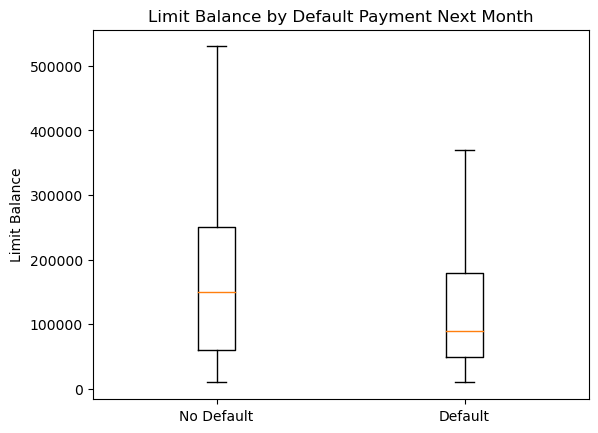

In [139]:
plt.boxplot([df1.loc[df1['default_payment_next_month'] == 0, 'limit_balance'], df1.loc[df1['default_payment_next_month'] == 1, 'limit_balance']],showfliers=False)
plt.xticks([1, 2], ['No Default', 'Default'])
plt.ylabel('Limit Balance')
plt.title('Limit Balance by Default Payment Next Month')
plt.show()

Pengguna kredit yang tidak bermasalah dan dapat membayar cicilan minimal tepat waktu akan mendapatkan jumlah limit balance yang lebih tinggi daripada pengguna kredit yang bermasalah.

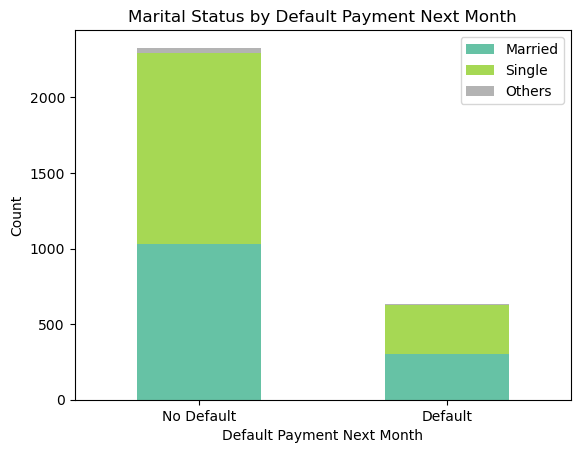

In [140]:
import matplotlib.cm as cmp
# Define custom color map
colors = cm.Set2(np.linspace(0, 1, 3))

# Group and plot data
status_counts = df1.groupby(['default_payment_next_month', 'marital_status']).size().unstack()
status_counts.plot(kind='bar', stacked=True, color=colors)
plt.xticks([0, 1], ['No Default', 'Default'], rotation=0)
plt.xlabel('Default Payment Next Month')
plt.ylabel('Count')
plt.title('Marital Status by Default Payment Next Month')
plt.legend(['Married', 'Single', 'Others'])
plt.show()

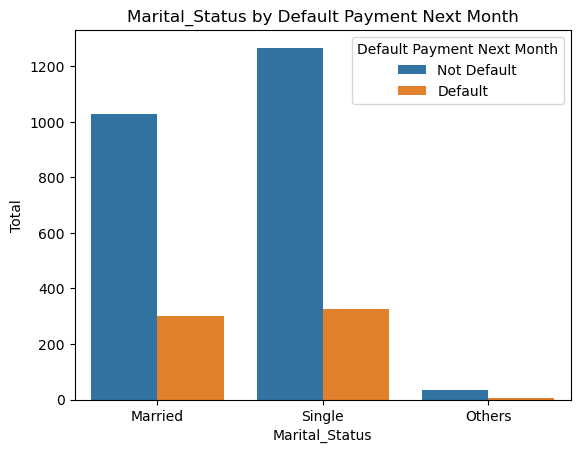

In [147]:
# define the new labels
new_labels = ['Married', 'Single', 'Others']

# create the countplot
sns.countplot(data=df1, x='marital_status', hue='default_payment_next_month')

# set the axis labels and title
plt.xlabel('Marital_Status')
plt.ylabel('Total')
plt.title('Marital_Status by Default Payment Next Month')

# set the new x-axis labels
plt.xticks(ticks=[0,1,2], labels=new_labels)

# set the new legend labels
plt.legend(title='Default Payment Next Month', labels=['Not Default', 'Default'])

# show the plot
plt.show()

Secara tingkat Marital Status untuk status 1 dan 2 memiliki rasio yang relatif sama atau rasio orang menikah atau tidak memiliki tingkat default yang relatif sama.

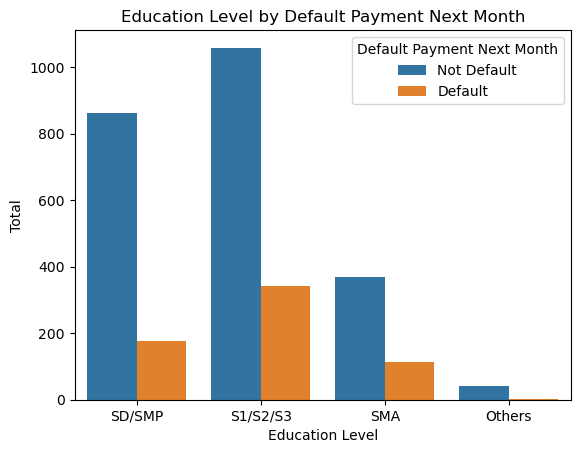

In [150]:
# define the new labels
new_labels = ['SD/SMP', 'S1/S2/S3', 'SMA', 'Others']

# create the countplot
sns.countplot(data=df1, x='education_level', hue='default_payment_next_month')

# set the axis labels and title
plt.xlabel('Education Level')
plt.ylabel('Total')
plt.title('Education Level by Default Payment Next Month')

# set the new x-axis labels
plt.xticks(ticks=[0,1,2,3], labels=new_labels)

# set the new legend labels
plt.legend(title='Default Payment Next Month', labels=['Not Default', 'Default'])

# show the plot
plt.show()

In [ ]:

`1` adalah lulusan sekolah menengah kebawah (**SD/SMP**)

`2` adalah lulusan sarjana (**Sarjana/Magister/Doktoral**)

`3` adalah lulusan sekolah menengah atas (**SMA**)

`4` adalah lulusan sekolah lainnya.

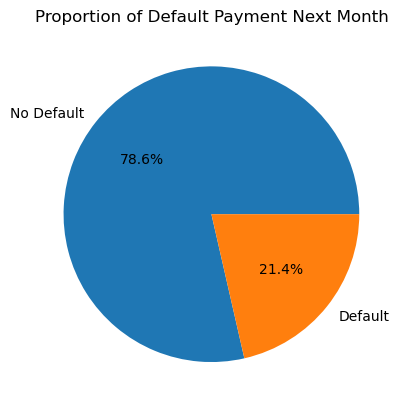

In [142]:
default_counts = df1['default_payment_next_month'].value_counts()
plt.pie(default_counts, labels=['No Default', 'Default'], autopct='%1.1f%%')
plt.title('Proportion of Default Payment Next Month')
plt.show()

Berdasarkan plot diatas bisa dilihat bahwa 21.4% pengguna kartu kredit tidak bisa membayar batas minimal cicilan kartu kredit pada bulan selanjutnya.

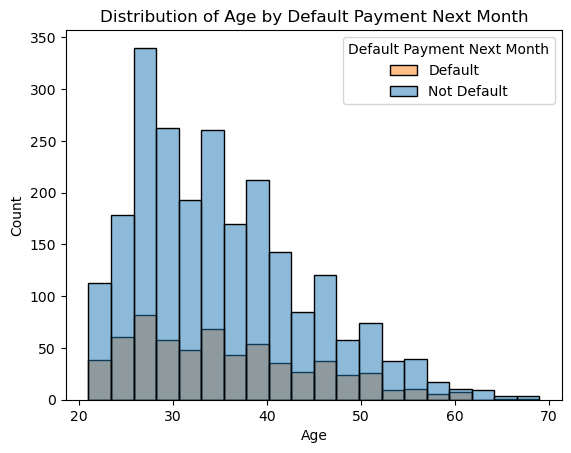

In [143]:
sns.histplot(data=df1, x='age', hue='default_payment_next_month', stat='count', bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age by Default Payment Next Month')

# set the new legend labels
plt.legend(title='Default Payment Next Month', labels=['Default', 'Not Default'])

plt.show()

Dapat dilihat bahwa persebaran pengguna kartu kredit berada di rentang 21 hingga 69 tahun dengan rata-rata berada di 35 tahun.

Pada plot tersebut juga terlihat bahwa pada kisaran umur 25-30 adalah umur pengguna kartu kredit yang paling konsumtif dan paling aktif dalam bertransaksi menggunakan kartu kredit. 

Pada plot tersebut pula terlihat bahwa pada kisaran umur 25-40 tahun adalah umur pengguna kartu yang memiliki tingkat default terbesar dan berkemungkinan untuk default terbesar.

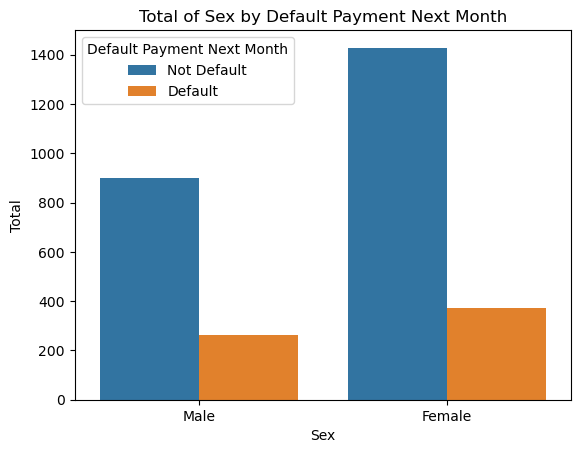

In [144]:
# define the new labels
new_labels = ['Male', 'Female']

# create the countplot
sns.countplot(data=df1, x='sex', hue='default_payment_next_month')

# set the axis labels and title
plt.xlabel('Sex')
plt.ylabel('Total')
plt.title('Total of Sex by Default Payment Next Month')

# set the new x-axis labels
plt.xticks(ticks=[0,1], labels=new_labels)

# set the new legend labels
plt.legend(title='Default Payment Next Month', labels=['Not Default', 'Default'])

# show the plot
plt.show()

Pada plot diatas menjelaskan bahwa jenis kelamin wanita lebih konsumtif daripada laki-laki.

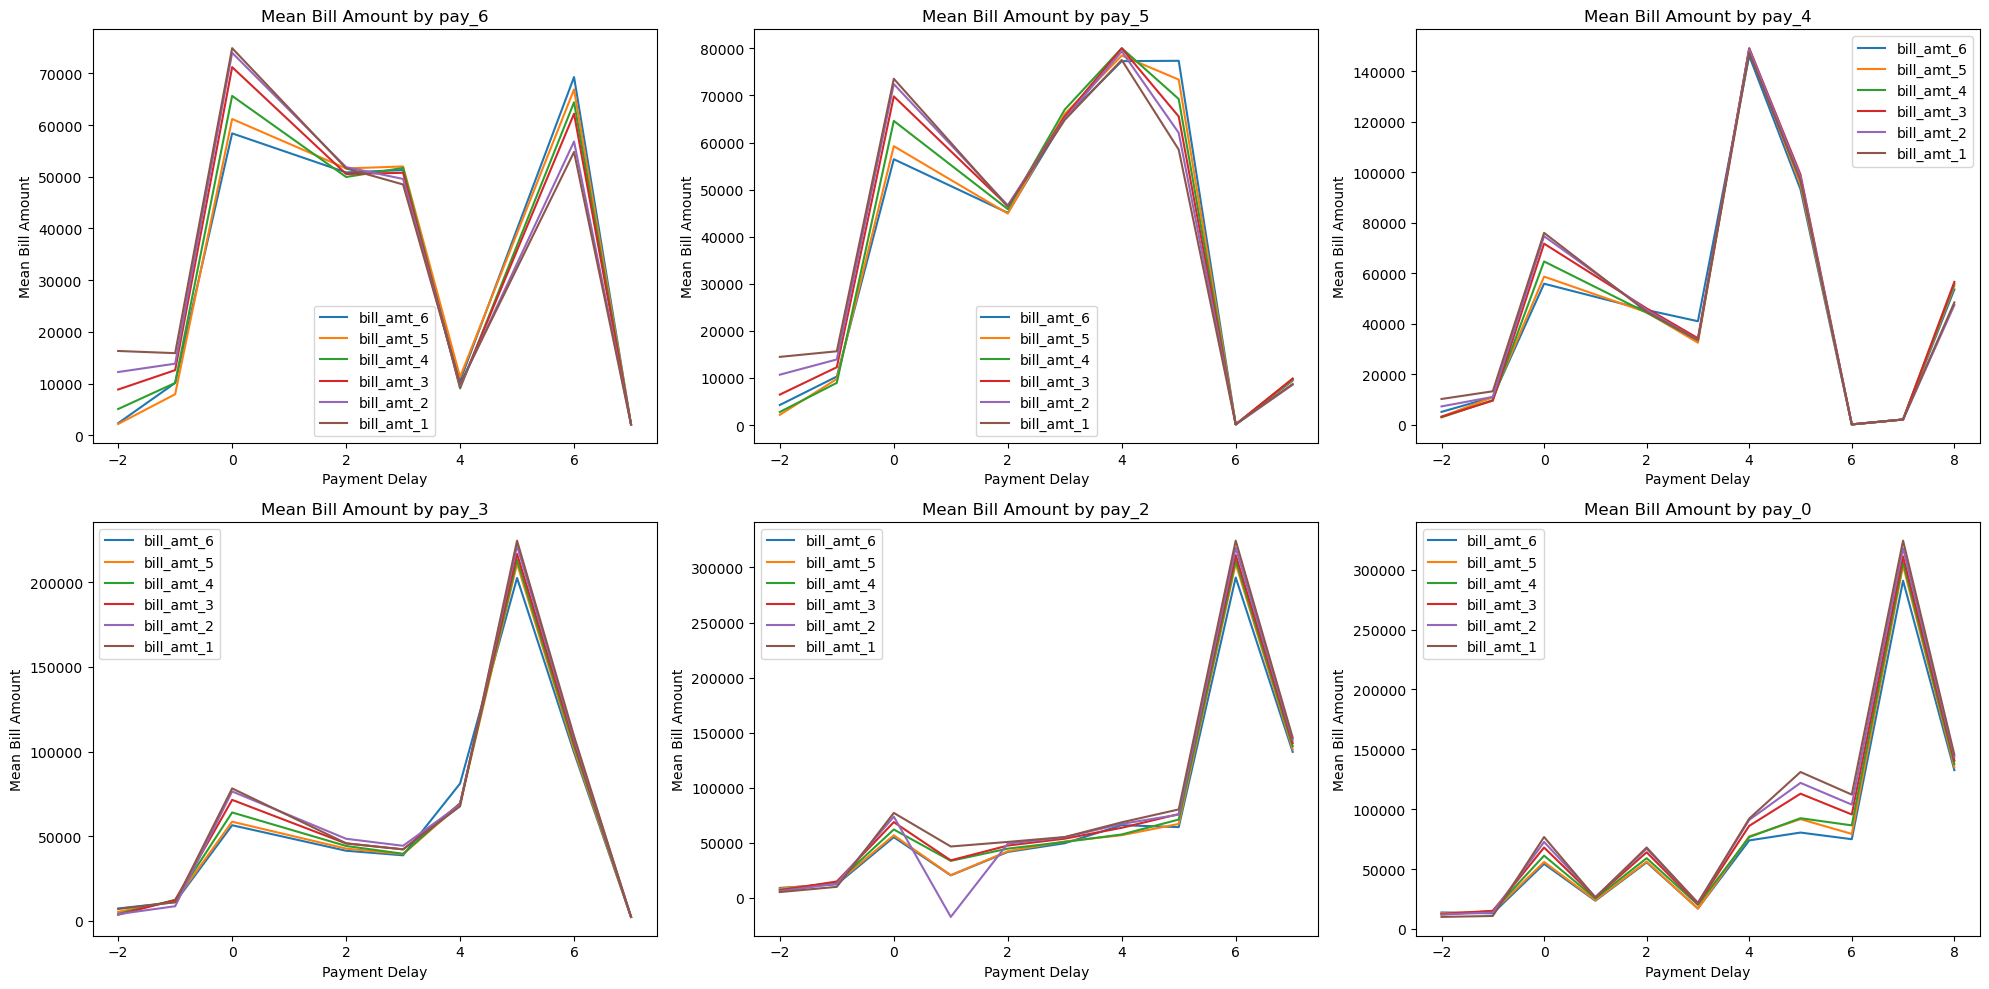

In [145]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
pay_cols = ['pay_6', 'pay_5', 'pay_4', 'pay_3', 'pay_2', 'pay_0']
bill_cols = ['bill_amt_6', 'bill_amt_5', 'bill_amt_4', 'bill_amt_3', 'bill_amt_2', 'bill_amt_1']

for i, pay_col in enumerate(pay_cols):
    row = i // 3
    col = i % 3
    ax = axes[row][col]
    bill_means = df1.groupby(pay_col)[bill_cols].mean()
    bill_means.plot(ax=ax, kind='line', rot=0)
    ax.set_xlabel('Payment Delay')
    ax.set_ylabel('Mean Bill Amount')
    ax.set_title(f'Mean Bill Amount by {pay_col}')

plt.tight_layout()
plt.show()

Plot diatas menjelaskan bahwa Total Tagihan pengguna kartu kredit pada kategori -2, dan -1 terlihat stabil dimana tidak melebihi batas 20000 dolar cenderung berkurang di semua bulan.
Untuk kategori 0 cenderung stabil pada kisaran 70000 dolar. 
Untuk kategori 1 hingga 8 merupakan kategori pengguna kartu kredit yang sangat fluktuatif yaitu seseorang pengguna dapat sewaktu-waktu berpindah kategori sesuai dengan bagaimana mereka membayar tagihan minimum perbulannya agar tidak dinyatakan gagal bayar pada bulan tersebut.

Dapat dilihat bahwa terjadi akumulasi dari jumlah pengguna kartu kredit di kategori 3 hingga kategori 7 dari bulan april (pay_6) hingga bulan september(pay_0) sebelum akhirnya turun drastis pada kategori 8.

Penuruan drastis tersebut dikarenakan pengguna kartu kredit sudah dinyatakan oleh otoritas kredit bank sebagai Default dalam artian mereka adalah orang yang tidak bisa membayar cicilan minimum bulanan selama 6 bulan berturut-turut dan akun kartu tersebut ditutup secara otomatis dan akun pengguna dihapus oleh otoritas kredit bank dari sistem bank.

In [146]:
# Step 1: Compute the mean of each bill_amt_col
mean_pay_amt = df[pay_amt_cols].mean()

# Step 2: Concatenate the resulting means into a single dataframe
mean_pay_amt_df = pd.concat([mean_pay_amt], axis=1)

# Step 3: Add a new column to the concatenated dataframe containing the corresponding pay_col
mean_pay_amt_df['pay_col'] = pay_cols

# Step 4: Melt the dataframe to a long format
melted_df = mean_pay_amt_df.melt(id_vars=['pay_col'], value_name='mean_pay_amt', var_name='pay_amt_cols')

# Step 5: Plot the resulting melted dataframe using seaborn's lineplot
ax = sns.lineplot(x='pay_col', y='mean_pay_amt', hue='pay_amt_cols', data=melted_df)
plt.title('Mean Bill Amount by Payment Delay')
plt.xlabel('Payment Delay')
plt.ylabel('Mean Pay Amount')
ax.set_xticklabels(['April', 'Mei', 'June', 'July', 'August', 'September'])
ax.legend(['Average'])
plt.show()

TypeError: cannot concatenate object of type '<class 'numpy.float64'>'; only Series and DataFrame objs are valid

In [ ]:
# Step 1: Compute the mean of each bill_amt_col
mean_pay_amt = df[pay_amt_cols].mean()

# Step 2: Concatenate the resulting means into a single dataframe
mean_pay_amt_df = pd.concat([mean_pay_amt], axis=1)

# Step 3: Add a new column to the concatenated dataframe containing the corresponding pay_col
mean_pay_amt_df['pay_col'] = pay_cols

# Step 4: Melt the dataframe to a long format
melted_df = mean_pay_amt_df.melt(id_vars=['pay_col'], value_name='mean_pay_amt', var_name='pay_amt_cols')

# Step 5: Plot the resulting melted dataframe using seaborn's lineplot
ax = sns.lineplot(x='pay_col', y='mean_pay_amt', hue='pay_amt_cols', data=melted_df)
plt.title('Mean Pay Amount by Payment Delay')
plt.xlabel('Payment Delay')
plt.ylabel('Mean Pay Amount')
ax.set_xticklabels(['April', 'Mei', 'June', 'July', 'August', 'September'])
ax.legend(['Average'])
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
pay_cols = ['pay_6', 'pay_5', 'pay_4', 'pay_3', 'pay_2', 'pay_0']
pay_cols_labels = ['April', 'Mei', 'June', 'July', 'August', 'September']
pay_amt_cols = ['pay_amt_6', 'pay_amt_5', 'pay_amt_4', 'pay_amt_3', 'pay_amt_2', 'pay_amt_1']

for i, pay_col in enumerate(pay_cols):
    row = i // 3
    col = i % 3
    ax = axes[row][col]
    pay_amt_means = df1.groupby(pay_col)[pay_amt_cols].mean()
    pay_amt_means.plot(ax=ax, kind='line', rot=0)
    ax.set_xlabel('Payment Delay')
    ax.set_ylabel('Mean Pay Amount')
    ax.set_title(f'Mean Pay Amount by {pay_cols_labels[i]}')
    mean_pay_amt = pay_amt_means.mean().mean()  # calculate the mean of the mean pay amount
    ax.axhline(mean_pay_amt, linestyle='--', color='red')  # plot the average line

plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
pay_cols = ['pay_6', 'pay_5', 'pay_4', 'pay_3', 'pay_2', 'pay_0']
pay_cols_labels = ['April', 'Mei', 'June', 'July', 'August', 'September']
bill_cols = ['bill_amt_6', 'bill_amt_5', 'bill_amt_4', 'bill_amt_3', 'bill_amt_2', 'bill_amt_1']

for i, (pay_col, bill_col) in enumerate(zip(pay_cols, bill_cols)):
    row = i // 3
    col = i % 3
    ax = axes[row][col]
    pay_bill_means = df.groupby(pay_col)[bill_col].mean()
    pay_bill_means.plot(ax=ax, kind='line', rot=0)
    ax.set_xlabel('Payment Delay')
    ax.set_ylabel('Mean Bill Amount')
    ax.set_title(f'{bill_col} by {pay_cols_labels[i]}')
    mean_pay_bill = pay_bill_means.mean()
    ax.axhline(mean_pay_bill, linestyle='--', color='red')
    
plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
pay_cols = ['pay_6', 'pay_5', 'pay_4', 'pay_3', 'pay_2', 'pay_0']
pay_cols_labels = ['April', 'Mei', 'June', 'July', 'August', 'September']
pay_amt_cols = ['pay_amt_6', 'pay_amt_5', 'pay_amt_4', 'pay_amt_3', 'pay_amt_2', 'pay_amt_1']

for i, (pay_col, pay_amt_cols) in enumerate(zip(pay_cols, pay_amt_cols)):
    row = i // 3
    col = i % 3
    ax = axes[row][col]
    pay_bill_means = df.groupby(pay_col)[pay_amt_cols].mean()
    pay_bill_means.plot(ax=ax, kind='line', rot=0)
    ax.set_xlabel('Payment Delay')
    ax.set_ylabel('Mean Bill Amount')
    ax.set_title(f'{pay_amt_cols} by {pay_cols_labels[i]}')
    mean_pay_bill = pay_bill_means.mean()
    ax.axhline(mean_pay_bill, linestyle='--', color='red')

plt.tight_layout()
plt.show()

Default juga dapat terjadi pada hutang tanpa jaminan, seperti tagihan medis dan saldo kartu kredit. Sementara hutang tanpa jaminan tidak didukung oleh aset, pemberi pinjaman masih memiliki tuntutan hukum jika terjadi Default. Perusahaan kartu kredit akan menunggu beberapa bulan sebelum menyatakan default ke peminjam.

Setelah enam bulan atau lebih tanpa pembayaran atas saldo terutang, utang akan ditagih, artinya pemberi pinjaman akan menghapusnya sebagai kerugian dan menutup rekening. Kreditur kemudian dapat menjual hutang yang telah dibebankan ke agen penagihan, yang kemudian akan berusaha untuk menagih dari peminjam.

Ketika default melibatkan hutang tanpa jaminan, agen penagihan yang membeli hutang memiliki hak gadai, atau penilaian, ditempatkan terhadap aset peminjam. Gugatan hak gadai adalah putusan pengadilan yang memberikan kreditur hak untuk menguasai properti debitur jika debitur gagal memenuhi kewajiban kontraktual.

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
df1.groupby('pay_6')['limit_balance'].mean().plot(ax=axes[0,0], kind='bar', rot=0, label='April')
df1.groupby('pay_5')['limit_balance'].mean().plot(ax=axes[0,1], kind='bar', rot=0, label='Mei')
df1.groupby('pay_4')['limit_balance'].mean().plot(ax=axes[0,2], kind='bar', rot=0, label='June')
df1.groupby('pay_3')['limit_balance'].mean().plot(ax=axes[1,0], kind='bar', rot=0, label='July')
df1.groupby('pay_2')['limit_balance'].mean().plot(ax=axes[1,1], kind='bar', rot=0, label='August')
df1.groupby('pay_0')['limit_balance'].mean().plot(ax=axes[1,2], kind='bar', rot=0, label='September')
for ax in axes.flatten():
    ax.set_xlabel('Payment Delay')
    ax.set_ylabel('Mean Limit Balance')
    ax.legend()
plt.show()

Terlihat pada plot diatas bahwa limit balance untuk kategori 0 hingga -2 cenderung stabil dan tetap.

Untuk kategori 1 hingga 8 terlihat sangat fluktuatif bahkan terdapat beberapa kategori yang meningkat drastis yang kemungkinan besar karena akumulasi dari perpindahan kategorikal pengguna kartu kredit yang disebabkan oleh pengguna kartu kredit gagal membayar tagihan minimum yang ditetapkan oleh kredit bank pada bulan tersebut dan bulan-bulan sebelumnya.

In [ ]:
corr = df1[['age','marital_status','education_level','sex','limit_balance', 'pay_0', 'bill_amt_1', 'default_payment_next_month']].corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix of Selected Variables')
plt.show()

Terlihat bahwa variabel pay_0 adalah variabel yang paling berpengaruh terhadap value default_payment_next_year.

In [ ]:
# create a list of features to calculate VIF for
features = ['sex', 'education_level', 'marital_status', 'age', 'limit_balance', 'pay_6', 'bill_amt_6', 'pay_amt_6', 'pay_5', 'bill_amt_5', 'pay_amt_5', 'pay_4', 'bill_amt_4', 'pay_amt_4', 'pay_3', 'bill_amt_3', 'pay_amt_3', 'pay_2', 'bill_amt_2', 'pay_amt_2', 'pay_0', 'bill_amt_1', 'pay_amt_1','default_payment_next_month']
# calculate VIF for each feature
vif = [variance_inflation_factor(df1[features].values, i) for i in range(len(features))]
# create a dataframe to store the VIF values
vif_df = pd.DataFrame({'Feature': features, 'VIF': vif})
# display the VIF dataframe sorted by VIF values in descending order
print(vif_df.sort_values(by='VIF', ascending=False))


Berdasarkan tingkat VIF diatas, terlihat bahwa bill_amt memiliki tingkat hubungan yang tinggi antara variabel yang lain.

# Feature Engineering

Pada Feature Engineering ini hal yang harus dilakukan adalah Test and Load dengan Train dan Test antara X dan y.

In [151]:
#pisahkan antara fitur dan target
X = df.drop(['default_payment_next_month'],axis=1) #Feature
y = df['default_payment_next_month'] #Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #Split antara X train, X test, y train, y test dengan train:test rasio sebesar 80:20
print('Original set  ---> ',X.shape,y.shape,'\nTraining set  ---> ',X_train.shape,y_train.shape,'\nTesting set   ---> ', X_test.shape,'', y_test.shape)

Original set  --->  (2964, 23) (2964,) 
Training set  --->  (2371, 23) (2371,) 
Testing set   --->  (593, 23)  (593,)


In [152]:
print('limit_balance skew:',X_train['limit_balance'].skew(),'\nsex:',X_train['sex'].skew(),'\nmarital_status:',X_train['marital_status'].skew(),'\neducation_level:',X_train['education_level'].skew(),'\nage:',X_train['age'].skew())

limit_balance skew: 1.015154459834294 
sex: -0.4236162756929647 
marital_status: 0.029484613345510093 
education_level: 0.49559872610730066 
age: 0.7797800753654462


In [153]:
X_train1 = X_train.copy()

In [154]:
# get the skewed features
skewed_feats = X_train1.skew().sort_values(ascending=False)

# select features with skewness > 1
skewed_feats = skewed_feats[skewed_feats > 1].index

# apply log transformation to the selected features
for feat in skewed_feats:
    X_train1[feat] = np.log1p(X_train1[feat])

X_train1[feat].count()

2371

In [155]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2371 entries, 489 to 357
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   limit_balance    2371 non-null   float64
 1   sex              2371 non-null   int64  
 2   education_level  2371 non-null   int64  
 3   marital_status   2371 non-null   int64  
 4   age              2371 non-null   float64
 5   pay_0            2371 non-null   float64
 6   pay_2            2371 non-null   float64
 7   pay_3            2371 non-null   float64
 8   pay_4            2371 non-null   float64
 9   pay_5            2371 non-null   float64
 10  pay_6            2371 non-null   float64
 11  bill_amt_1       2371 non-null   float64
 12  bill_amt_2       2371 non-null   float64
 13  bill_amt_3       2371 non-null   float64
 14  bill_amt_4       2371 non-null   float64
 15  bill_amt_5       2371 non-null   float64
 16  bill_amt_6       2371 non-null   float64
 17  pay_amt_1    

## Feature Selection

Dalam feature selection ini kita memilih seluruh variabel karena seluruh variabel memiliki keterhubungan antar variabel. 

In [156]:
# split into numerical and categorical column
num_cols = ['limit_balance','age','bill_amt_6','bill_amt_5','bill_amt_4','bill_amt_3','bill_amt_2','bill_amt_1','pay_amt_6','pay_amt_5','pay_amt_4','pay_amt_3','pay_amt_2','pay_amt_1']
cat_cols = ['sex','education_level','marital_status','pay_6','pay_5','pay_4','pay_3','pay_2','pay_0']

### Feature Selection using PCA

PCA digunakan untuk mereduksi tingkat dimensionality data tersebut sehingga tidak semua variabel digunakan pada analisis ini.

In [157]:
# Standardize numerical columns
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[num_cols])

# Apply PCA to numerical columns
pca = PCA(n_components=6)
X_train_num_pca = pca.fit_transform(X_train_num)

# Print the explained variance ratio of each component
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.41668124 0.12218005 0.08387026 0.07107913 0.06651093 0.06285213]


Didapatkan bahwa dengan menggunakan 6 komponen PCA mereduksi dimensionality yang dimana hanya menggunakan 81% dari seluruh data train secara efektif.

In [ ]:
# Standardize numerical columns of test data
X_test_num = scaler.transform(X_test[num_cols])

# Apply PCA to numerical columns of test data
X_test_num_pca = pca.transform(X_test_num)


In [ ]:
# Concatenate numerical PCA features with categorical features
X_train_pca = np.concatenate((X_train_num_pca, X_train[cat_cols]), axis=1)
# Concatenate numerical PCA features with categorical features of test data
X_test_pca = np.concatenate((X_test_num_pca, X_test[cat_cols]), axis=1)

# Model Definition

Di dalam pemodelan ini menggunakan 7 jenis pemodelan yaitu 

- `Logistik Regresi`

- `Decission Tree Classifier`

- `Support Vector Machine`

- `Random Forest Classifier`

- `Gaussian Naive Bayes`

- `KNeighbors Classifier`

- `Adaptive Boost Classifier`

In [ ]:
models = [LogisticRegression(random_state=42), DecisionTreeClassifier(random_state=42), SVC(random_state=42), RandomForestClassifier(random_state=42),
          GaussianNB(), KNeighborsClassifier(), AdaBoostClassifier(random_state=42)]

# Model Training

Pada bagian model training ini langsung menggunakan metode pipeline untuk mempermudah model trainingnya.

Pada bagian pipeline terdapat:

- `cat_transformer` yang berisikan variabel kategori yang dilakukan feature engineering seperti ordinal encoding.

- `num_transformer` yang berisikan variabel numerik yang dilakukan feature engineering seperti standard scaler.

- `preprocessor` yang melakukan kolom transformer untuk `cat_transformer` dan `num_transformer`.

- `pipeline` yang berupa preprocessor dan model klasifikasi.

- `models` merupakan semua jenis model yang akan digunakan.

Pada analisis ini akan difokuskan untuk mencari nilai dari Recall kategori 1 atau False Negative dari Variabel Target.

Output dari pipeline ini adalah pipeline dan recall score untuk data test dan data train.

In [ ]:
# define the preprocessing steps for categorical and numerical columns
cat_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[[1, 2], [1, 2, 3, 4], [1, 2, 3], [-2, -1, 0, 2, 3, 4, 6, 7], [-2, -1, 0, 2, 3, 4, 5, 6, 7], [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8], [-2, -1, 0, 2, 3, 4, 5, 6, 7], [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7], [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]]))
])

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()), 
    ('pca',PCA(n_components=6))
])

# create the column transformer to apply the preprocessing steps to the data
preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, cat_cols),
    ('num', num_transformer, num_cols)
])

# create the pipeline to apply the logistic regression, decision tree classifier,
# support vector machine, random forest, naive bayes, knn, and adaboost.
pipeline = imbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampling', SMOTE(random_state=42)),
    ('classifier', None)
])

# define the models to be applied in the pipeline
models = [LogisticRegression(random_state=42), DecisionTreeClassifier(random_state=42), SVC(random_state=42), RandomForestClassifier(random_state=42),
          GaussianNB(), KNeighborsClassifier(), AdaBoostClassifier(random_state=42)]

# prepare the cross-validation procedure
kfolds = KFold(n_splits=10, random_state=42, shuffle=True)

# train and evaluate each model using cross-validation
from sklearn.model_selection import cross_val_score
for model in models:
    pipeline.set_params(classifier=model)
    scores_train = cross_val_score(pipeline, X_train, y_train, cv=kfolds, scoring='recall_macro')
    scores_test = cross_val_score(pipeline, X_test, y_test, cv=kfolds, scoring='recall_macro')
    print(f'{type(model).__name__} Train Recall: {scores_train.mean():.3f} (+/- {scores_train.std():.3f})')
    print(f'{type(model).__name__} Test Recall: {scores_test.mean():.3f} (+/- {scores_test.std():.3f})')

Didapatkan recall skor untuk train data dan test data dari masing-masing model tanpa hyperparameter tuning dengan model nilai tertinggi adalah model `KNeighborsClassifier` dengan nilai akurasi sebesar 0.612 pada train dan merupakan model cenderung goodfit. 

`DecisionTreeClassifier` mendapatkan skor recall terendah dengan skor 0.569 dengan model cenderung underfitting.

Selanjutnya akan dicoba untuk melihat akurasi dari model yang melalui hyperparameter tuning.

# Hyperparameter Tuning

Hyperparameter tuning adalah proses mencari nilai optimal untuk parameter yang tidak dapat dipelajari oleh model pada saat pelatihan, tetapi harus ditentukan sebelumnya oleh pengguna. Hal ini sering kali dilakukan untuk meningkatkan performa model dalam memprediksi data yang belum dilihat sebelumnya.

Hyperparameter tuning dilakukan dengan menggunakan `GridSearchCV`. 

`GridSearchCV` melakukan pencarian secara sistematis pada ruang parameter yang ditentukan oleh pengguna. Setiap iterasi pada keduanya melibatkan pelatihan model dengan kombinasi nilai parameter yang berbeda, dan evaluasi performa model dengan skor validasi silang.

Setelah pencarian selesai, hasilnya adalah kombinasi parameter yang menghasilkan skor validasi silang terbaik. Kemudian, pengguna dapat menggunakan parameter ini untuk membangun model final yang akan digunakan untuk memprediksi data yang belum dilihat sebelumnya.

**Warning!!! Running HyperParameter Tuning memakan banyak waktu**

In [ ]:
from sklearn.model_selection import GridSearchCV

# create a dictionary of hyperparameters for each model
logreg_params = {'classifier__solver':['lbfgs','liblinier'],
                 'classifier__penalty': ['l1', 'l2'], 
                 'classifier__C': [0.01, 0.1, 1, 10, 100],
                 'classifier__random_state': [42]}

dt_params = {'classifier__criterion': ['gini', 'entropy'], 
             'classifier__max_depth': [5, 10, 15, 20, None],
             'classifier__min_samples_split': [2, 5, 10, 15],
             'classifier__random_state': [42]}

svm_params = {'classifier__C': [0.01, 0.1, 1, 10, 100], 
              'classifier__kernel': ['linear', 'rbf','poly'],
              'classifier__random_state': [42]}

rf_params = {'classifier__n_estimators': [100, 300],
             'classifier__max_depth': [5, 10, 15, 20],
             'classifier__min_samples_split': [2, 5, 10, 15],
             'classifier__max_features': ['auto', 'sqrt'],
             'classifier__random_state': [42]}

nb_params = {}

knn_params = {'classifier__n_neighbors': [5, 10, 15, 20], 
              'classifier__weights': ['uniform', 'distance'],
              'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

ada_params = {'classifier__n_estimators': [50, 100, 150], 
              'classifier__learning_rate': [0.01, 0.1, 1, 10],
              'classifier__random_state': [42]}

# create a dictionary of hyperparameters for each model
param_grid = {
    'LogisticRegression': logreg_params,
    'DecisionTreeClassifier': dt_params,
    'SVM': svm_params,
    'RandomForestClassifier': rf_params,
    'GaussianNB': nb_params,
    'KNeighborsClassifier': knn_params,
    'AdaBoostClassifier': ada_params,
}

# create a dictionary of models
models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVM': SVC(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
}


# prepare the cross-validation procedure
kfolds = KFold(n_splits=10, random_state=42, shuffle=True)

# loop through each model and its corresponding hyperparameters to perform grid search cross-validation
for model_name, model in models.items():
    pipeline.set_params(classifier=model)
    if model_name in param_grid:
        grid_search = GridSearchCV(pipeline, param_grid[model_name], cv=kfolds)
        grid_search.fit(X_train, y_train)
        best_scores[model_name] = grid_search.best_score_
        print(f'{model_name} Best Parameters: {grid_search.best_params_}')
        print(f'{model_name} Best Score: {grid_search.best_score_}')
        print(f'{model_name} Recall Score: {grid_search.cv_results_["mean_test_score"].mean()}')

Didapatkan model parameter dan skor terbaik dari seluruh model yang dilakukan hyperparameter tuning. Dari seluruh model yang dilakukan hyperparameter tuning didapatkan model `AdaBoostClassifier` merupakan model dengan skor terbaik dengan recall score 0.827 dan best score 0.835 dengan parameter terbaiknya adalah 

{'classifier__learning_rate': 10, 'classifier__n_estimators': 50, 'classifier__random_state': 42}.

Setelah didapatkan model dengan parameter dan skor terbaik, aplikasikan parameter tersebut kedalam pipeline yang terbaru yang telah dilakukan hyperparameter tuning.

In [ ]:
# define the preprocessing steps for categorical and numerical columns
cat_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[[1, 2], [1, 2, 3, 4], [1, 2, 3], [-2, -1, 0, 2, 3, 4, 6, 7], [-2, -1, 0, 2, 3, 4, 5, 6, 7], [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8], [-2, -1, 0, 2, 3, 4, 5, 6, 7], [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7], [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]]))
])

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()), 
    ('pca',PCA(n_components=6))
])

# create the column transformer to apply the preprocessing steps to the data
preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, cat_cols),
    ('num', num_transformer, num_cols)
])

# create the pipeline to apply the logistic regression, decision tree classifier,
# support vector machine, random forest, naive bayes, knn, and adaboost.
pipeline_tuned = imbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampling', SMOTE(k_neighbors=5,sampling_strategy='auto',random_state=42)),
    ('classifier', None)
])

# define the models to be applied in the pipeline
models_tuned = [LogisticRegression(C=10, penalty='l2', solver='lbfgs', random_state=42), 
                DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=2, random_state=42), 
                SVC(C=10, kernel='rbf', random_state=42), 
                RandomForestClassifier(max_depth=5, max_features='auto', min_samples_split=5, n_estimators=100, random_state=42),
                GaussianNB(), 
                KNeighborsClassifier(algorithm='auto', n_neighbors=10, weights='distance'), 
                AdaBoostClassifier(learning_rate=0.1, n_estimators=50, random_state=42)]

# prepare the cross-validation procedure
kfolds = KFold(n_splits=10, random_state=42, shuffle=True)

# train and evaluate each model using cross-validation
from sklearn.model_selection import cross_val_score
for model in models_tuned:
    pipeline_tuned.set_params(classifier=model)
    scores_train = cross_val_score(pipeline_tuned, X_train, y_train, cv=kfolds, scoring='recall_macro')
    scores_test = cross_val_score(pipeline_tuned, X_test, y_test, cv=kfolds, scoring='recall_macro')
    print(f'{type(model).__name__} Train Recall: {scores_train.mean():.3f} (+/- {scores_train.std():.3f})')
    print(f'{type(model).__name__} Test Recall: {scores_test.mean():.3f} (+/- {scores_test.std():.3f})')

Terlihat sedikit kenaikan skor recall pada beberapa model yang sesudah dilakukan hyperparameter tuning.

Model `Decision Tree Classifier` adalah model dengan peningkatan terbesar yaitu dengan peningkatan recall skor train data sebesar 0.037 dan akurasi skor test data sebesar 0.023.

Sementara itu, Model `Gaussian Naive Bayes` adalah model yang tidak mengalami peningkatan skor recall.

Dapat disimpulkan bahwa hyperparameter tuning dapat meningkatkan akurasi skor dari model yang tidak dilakukan hyperparameter tuning.

# Model Evaluation

Dalam model evaluation ini akan menggunakan classification report sebagai media evaluasi. 

Dalam hal ini, Classification report adalah laporan yang menyajikan hasil evaluasi kinerja model klasifikasi pada set data uji. Laporan ini berisi beberapa metrik evaluasi, seperti akurasi, presisi, recall, dan f1-score, yang dapat membantu kita memahami seberapa baik model kita dalam mengklasifikasikan data.

Metrik ini berguna dalam mengevaluasi kinerja model klasifikasi dan dapat membantu mengidentifikasi area untuk perbaikan. Secara umum, model yang baik akan memiliki presisi, recall, dan skor F1 yang tinggi di semua kelas.

### Logistic Regression

In [ ]:
# create subplots with size of 15 x 8
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize=(15,8))

# fit the pipeline on the training data
pipeline_tuned.set_params(classifier=LogisticRegression(C=10, penalty='l2', solver='lbfgs', random_state=42))
pipeline_tuned.fit(X_train, y_train)

# make predictions on the test data
y_pred1 = pipeline_tuned.predict(X_train)

# make predictions on the test data
y_pred2 = pipeline_tuned.predict(X_test)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_train,y_pred1)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Default','Default'])
display.plot(ax = ax[0])
print("\nClassification Report:")
print(classification_report(y_train, y_pred1))
roc_auc = roc_auc_score(y_train, y_pred1)
print(f"ROC AUC Score: {roc_auc}")
ax[0].set_title('Confusion Matrix - Train Data',size = 15)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_test,y_pred2)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Default','Default'])
display.plot(ax = ax[1])
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))
roc_auc = roc_auc_score(y_test, y_pred2)
print(f"ROC AUC Score: {roc_auc}")
ax[1].set_title('Confusion Matrix - Test Data',size = 15)

# Show the Plots
plt.show()

Pada pemodelan menggunakan `Logistik Regresi` didapatkan score dari recall kategori 1 sebesar 0.34 pada train data dan 0.29 pada test data serta skor ROC-AUC sebesar 0.65 pada train data dan 0.62 pada test data.

Dapat dikatakan bahwa model `Logistik Regresi` memiliki nilai yang rendah dalam mengidentifikasi recall kategori 1 dengan skor ROC-AUC yang rendah.

----

### Decission Tree Classifier

In [ ]:
# create subplots with size of 15 x 8
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize=(15,8))

# fit the pipeline on the training data
pipeline_tuned.set_params(classifier=DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=2, random_state=42))
pipeline_tuned.fit(X_train, y_train)

# make predictions on the test data
y_pred1 = pipeline_tuned.predict(X_train)

# make predictions on the test data
y_pred2 = pipeline_tuned.predict(X_test)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_train,y_pred1)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Default','Default'])
display.plot(ax = ax[0])
print("\nClassification Report:")
print(classification_report(y_train, y_pred1))
roc_auc = roc_auc_score(y_train, y_pred1)
print(f"ROC AUC Score: {roc_auc}")
ax[0].set_title('Confusion Matrix - Train Data',size = 15)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_test,y_pred2)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Default','Default'])
display.plot(ax = ax[1])
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))
roc_auc = roc_auc_score(y_test, y_pred2)
print(f"ROC AUC Score: {roc_auc}")
ax[1].set_title('Confusion Matrix - Test Data',size = 15)

# Show the Plots
plt.show()

In [ ]:
276/(276+232)

Pada pemodelan menggunakan `Decission Tree Classifier` didapatkan score dari recall kategori 1 sebesar 0.52 pada train data dan 0.39 pada test data serta skor ROC-AUC sebesar 0.73 pada train data dan 0.65 pada test data.

Model `Decission Tree Classifier` memiliki skor yang tinggi pada recall kategori 1 dan ROC-AUC karena model ini tidak berpengaruh terhadap data tidak seimbang yang menyebabkan berpengaruhnya nilai skor akhir.

Dapat dikatakan bahwa model `Decission Tree Classifier` memiliki nilai yang tinggi dalam mengidentifikasi recall kategori 1 dengan skor ROC-AUC yang baik.

----

### Support Vector Machine

In [ ]:
# create subplots with size of 15 x 8
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize=(15,8))

# fit the pipeline on the training data
pipeline_tuned.set_params(classifier=SVC(C=10, kernel='rbf', random_state=42))
pipeline_tuned.fit(X_train, y_train)

# make predictions on the test data
y_pred1 = pipeline_tuned.predict(X_train)

# make predictions on the test data
y_pred2 = pipeline_tuned.predict(X_test)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_train,y_pred1)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Default','Default'])
display.plot(ax = ax[0])
print("\nClassification Report:")
print(classification_report(y_train, y_pred1))
roc_auc = roc_auc_score(y_train, y_pred1)
print(f"ROC AUC Score: {roc_auc}")
ax[0].set_title('Confusion Matrix - Train Data',size = 15)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_test,y_pred2)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Default','Default'])
display.plot(ax = ax[1])
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))
roc_auc = roc_auc_score(y_test, y_pred2)
print(f"ROC AUC Score: {roc_auc}")
ax[1].set_title('Confusion Matrix - Test Data',size = 15)

# Show the Plots
plt.show()

Pada pemodelan menggunakan `Support Vector Machine` didapatkan score dari recall kategori 1 sebesar 0.47 pada train data dan 0.31 pada test data serta skor ROC-AUC sebesar 0.72 pada train data dan 0.63 pada test data.

Model `Support Vector Machine` memiliki skor yang cenderung rendah pada recall kategori 1 dan ROC-AUC karena model ini sedikit berpengaruh terhadap data tidak seimbang yang menyebabkan berpengaruhnya nilai skor akhir.

Dapat dikatakan bahwa model `Support Vector Machine` memiliki nilai yang cenderung rendah dalam mengidentifikasi recall kategori 1 dengan skor ROC-AUC yang baik.

----

### Random Forest Classifier

In [ ]:
# create subplots with size of 15 x 8
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize=(15,8))

# fit the pipeline on the training data
pipeline_tuned.set_params(classifier=RandomForestClassifier(max_depth=5, max_features='auto', min_samples_split=5, n_estimators=100, random_state=42))
pipeline_tuned.fit(X_train, y_train)

# make predictions on the test data
y_pred1 = pipeline_tuned.predict(X_train)

# make predictions on the test data
y_pred2 = pipeline_tuned.predict(X_test)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_train,y_pred1)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Default','Default'])
display.plot(ax = ax[0])
print("\nClassification Report:")
print(classification_report(y_train, y_pred1))
roc_auc = roc_auc_score(y_train, y_pred1)
print(f"ROC AUC Score: {roc_auc}")
ax[0].set_title('Confusion Matrix - Train Data',size = 15)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_test,y_pred2)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Default','Default'])
display.plot(ax = ax[1])
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))
roc_auc = roc_auc_score(y_test, y_pred2)
print(f"ROC AUC Score: {roc_auc}")
ax[1].set_title('Confusion Matrix - Test Data',size = 15)

# Show the Plots
plt.show()

Pada pemodelan menggunakan `Random Forest Classifier` didapatkan score dari recall kategori 1 sebesar 0.45 pada train data dan 0.32 pada test data serta skor ROC-AUC sebesar 0.71 pada train data dan 0.63 pada test data.

Model `Random Forest Classifier` memiliki skor yang cenderung rendah pada recall kategori 1 dan ROC-AUC karena model ini sedikit berpengaruh terhadap data tidak seimbang yang menyebabkan berpengaruhnya nilai skor akhir.

Dapat dikatakan bahwa model `Random Forest Classifier` memiliki nilai yang cenderung rendah dalam mengidentifikasi recall kategori 1 dengan skor ROC-AUC yang baik.

----

### Gaussian Naive Bayes

In [ ]:
# create subplots with size of 15 x 8
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize=(15,8))

# fit the pipeline on the training data
pipeline_tuned.set_params(classifier=GaussianNB())
pipeline_tuned.fit(X_train, y_train)

# make predictions on the test data
y_pred1 = pipeline_tuned.predict(X_train)

# make predictions on the test data
y_pred2 = pipeline_tuned.predict(X_test)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_train,y_pred1)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Default','Default'])
display.plot(ax = ax[0])
print("\nClassification Report:")
print(classification_report(y_train, y_pred1))
roc_auc = roc_auc_score(y_train, y_pred1)
print(f"ROC AUC Score: {roc_auc}")
ax[0].set_title('Confusion Matrix - Train Data',size = 15)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_test,y_pred2)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Default','Default'])
display.plot(ax = ax[1])
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))
roc_auc = roc_auc_score(y_test, y_pred2)
print(f"ROC AUC Score: {roc_auc}")
ax[1].set_title('Confusion Matrix - Test Data',size = 15)

# Show the Plots
plt.show()

Pada pemodelan menggunakan `Gaussian Naive Bayes` didapatkan score dari recall kategori 1 sebesar 0.63 pada train data dan 0.54 pada test data serta skor ROC-AUC sebesar 0.72 pada train data dan 0.65 pada test data.

Model `Gaussian Naive Bayes` memiliki skor yang cenderung tinggi pada recall kategori 1 dan ROC-AUC karena model ini sedikit berpengaruh terhadap data tidak seimbang yang menyebabkan berpengaruhnya nilai skor akhir.

Dapat dikatakan bahwa model `Gaussian Naive Bayes` memiliki nilai yang cenderung tinggi dalam mengidentifikasi recall kategori 1 dengan skor ROC-AUC yang baik.

----

### K-Neighbors Classifier

In [ ]:
# create subplots with size of 15 x 8
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize=(15,8))

# fit the pipeline on the training data
pipeline_tuned.set_params(classifier=KNeighborsClassifier(algorithm='auto', n_neighbors=10, weights='distance'))
pipeline_tuned.fit(X_train, y_train)

# make predictions on the test data
y_pred1 = pipeline_tuned.predict(X_train)

# make predictions on the test data
y_pred2 = pipeline_tuned.predict(X_test)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_train,y_pred1)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Default','Default'])
display.plot(ax = ax[0])
print("\nClassification Report:")
print(classification_report(y_train, y_pred1))
roc_auc = roc_auc_score(y_train, y_pred1)
print(f"ROC AUC Score: {roc_auc}")
ax[0].set_title('Confusion Matrix - Train Data',size = 15)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_test,y_pred2)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Default','Default'])
display.plot(ax = ax[1])
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))
roc_auc = roc_auc_score(y_test, y_pred2)
print(f"ROC AUC Score: {roc_auc}")
ax[1].set_title('Confusion Matrix - Test Data',size = 15)

# Show the Plots
plt.show()

Pada pemodelan menggunakan `K-Neighbors Classifier` didapatkan score dari recall kategori 1 sebesar 1 pada train data dan 0.31 pada test data serta skor ROC-AUC sebesar 1 pada train data dan 0.62 pada test data.

Model `Gaussian Naive Bayes` memiliki skor yang sangat tinggi pada recall kategori 1 dan ROC-AUC kemungkinan model ini overfitting karena nilai train yang tinggi dan nilai test yang rendah.

----

### Adaptive Boost Classifier

In [ ]:
# create subplots with size of 15 x 8
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize=(15,8))

# fit the pipeline on the training data
pipeline_tuned.set_params(classifier=AdaBoostClassifier(learning_rate=0.1, n_estimators=50, random_state=42))
pipeline_tuned.fit(X_train, y_train)

# make predictions on the test data
y_pred1 = pipeline_tuned.predict(X_train)

# make predictions on the test data
y_pred2 = pipeline_tuned.predict(X_test)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_train,y_pred1)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Default','Default'])
display.plot(ax = ax[0])
print("\nClassification Report:")
print(classification_report(y_train, y_pred1))
roc_auc = roc_auc_score(y_train, y_pred1)
print(f"ROC AUC Score: {roc_auc}")
ax[0].set_title('Confusion Matrix - Train Data',size = 15)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_test,y_pred2)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Default','Default'])
display.plot(ax = ax[1])
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))
roc_auc = roc_auc_score(y_test, y_pred2)
print(f"ROC AUC Score: {roc_auc}")
ax[1].set_title('Confusion Matrix - Test Data',size = 15)

# Show the Plots
plt.show()

Pada pemodelan menggunakan `Adaptive Boost Classifier` didapatkan score dari recall kategori 1 sebesar 0.42 pada train data dan 0.31 pada test data serta skor ROC-AUC sebesar 0.69 pada train data dan 0.62 pada test data.

Model `Adaptive Boost Classifier` memiliki skor yang cenderung rendah pada recall kategori 1 dan ROC-AUC.

----

### Model Final

In [ ]:
# define the preprocessing steps for categorical and numerical columns
cat_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[[1, 2], [1, 2, 3, 4], [1, 2, 3], [-2, -1, 0, 2, 3, 4, 6, 7], [-2, -1, 0, 2, 3, 4, 5, 6, 7], [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8], [-2, -1, 0, 2, 3, 4, 5, 6, 7], [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7], [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]]))
])

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()), 
    ('pca',PCA(n_components=6))
])

# create the column transformer to apply the preprocessing steps to the data
preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, cat_cols),
    ('num', num_transformer, num_cols)
])

# create the pipeline to apply the logistic regression, decision tree classifier,
# support vector machine, random forest, naive bayes, knn, and adaboost.
pipeline_for_final = imbPipeline(steps=[
    ('preprocessor', preprocessor),
])

final_pipeline = Pipeline([
    ("preprocess", pipeline_for_final),
    ("classification", AdaBoostClassifier(learning_rate=0.1, n_estimators=50, random_state=42))
])

final_pipeline.fit(X_train, y_train)
hasil = final_pipeline.predict(X_test)

print(classification_report(y_test, hasil))

# Model Saving

Untuk melakukan saving pada model, cukup import joblib dan gunakan joblib.dump(nama variabel,'nama file.pkl'). Untuk dapat melakukan modelling pada notebook/file yang berbeda, kita akan ngesave model,scaling, dan encoder yang sudah di fit.

In [ ]:
joblib.dump(cat_transformer,'cat_transformer.pkl')
joblib.dump(num_transformer,'num_transformer.pkl')
joblib.dump(preprocessor,'preprocessor.pkl')
joblib.dump(pipeline_for_final,'pipeline_for_final.pkl')
joblib.dump(final_pipeline,'final_pipeline.pkl')

# Model Inference

**Dikerjakan di notebook terpisah**

# Conclusion

## Conceptual Problems

1. Apa yang dimaksud dengan criterion pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini !

- Criterion pada Decision Tree merujuk pada metode yang digunakan untuk menentukan pemisahan node yang paling baik dalam membangun sebuah model Decision Tree.

- Dalam pembangunan Decision Tree, setiap node akan dipecah menjadi dua anak node yang lebih kecil berdasarkan suatu kriteria tertentu. Beberapa kriteria yang umum digunakan dalam Decision Tree adalah Gini Index, Entropy, dan Classification Error.

- Dalam kasus ini menggunakan criterion Entrophy dimana Enthropy mengukur tingkat ketidakpastian atau informasi yang terkandung dalam data.

Sumber: https://scikit-learn.org/stable/modules/tree.html

----

2. Jelaskan apa yang dimaksud dengan pruning pada Tree-based model (alasan, definisi, jenis, dll) !

Pruning pada Tree-based model adalah teknik untuk mengurangi overfitting pada model pohon keputusan (decision tree) dengan menghapus cabang-cabang (subtree) yang tidak berkontribusi signifikan pada akurasi model.

Definisi: Pruning adalah teknik dalam machine learning yang mengurangi overfitting dengan memotong (menghapus) cabang-cabang pohon yang tidak terlalu berguna pada model.

Alasan: Overfitting terjadi ketika model terlalu kompleks sehingga model belajar untuk mengingat set data latih (training data) bukan untuk memahami pola-pola yang mendasari. Hal ini berakibat model tidak mampu menggeneralisasi dengan baik ke data yang belum pernah dilihat sebelumnya (testing data). Salah satu cara untuk mengurangi overfitting pada model pohon keputusan adalah dengan pruning.

Jenis-jenis pruning:

- Pre-pruning: dilakukan sebelum pembuatan pohon. Ini berarti memotong cabang yang tidak terlalu penting sebelum pohon dibuat sepenuhnya.

- Post-pruning: dilakukan setelah pohon dibuat. Ini berarti memotong cabang yang tidak terlalu penting setelah pohon dibuat. Post-pruning dapat dilakukan dengan menggunakan teknik Cross-validation.

- Reduced error pruning: Dilakukan dengan menghitung jumlah kesalahan pada setiap subtree (cabang) dan memotong cabang yang menyebabkan peningkatan kesalahan.

- Cost complexity pruning: Mengoptimalkan kompromi antara kesalahan model dan kompleksitas pohon dengan menggunakan parameter yang disebut alpha.

Pruning membantu mengurangi overfitting pada model pohon keputusan dan meningkatkan kemampuan generalisasi model pada data baru.

Sumber: Zhang, L., Wu, H., & Zhang, B. (2018). Decision tree pruning: A comprehensive survey. Artificial Intelligence Review, 49(4), 535-567.

----

3. Bagaimana cara memilih K yang optimal pada KNN ?

Cara memilih K yang optimal pada KNN (K-Nearest Neighbor) adalah dengan menggunakan teknik Cross-Validation. Cross-Validation adalah teknik evaluasi model yang digunakan untuk memeriksa keakuratan model pada data yang tidak terlihat selama pelatihan. Ada beberapa teknik Cross-Validation, salah satunya adalah K-Fold Cross-Validation.

Berikut adalah langkah-langkah untuk memilih K yang optimal menggunakan K-Fold Cross-Validation pada KNN:

- Pisahkan dataset menjadi data pelatihan (training) dan data validasi (validation).

- Tentukan nilai K yang ingin diuji, misalnya K = 1 hingga K = 10.

- Lakukan K-Fold Cross-Validation pada data pelatihan dengan nilai K yang telah ditentukan.

- Hitung akurasi rata-rata dari hasil K-Fold Cross-Validation pada setiap nilai K.

- Pilih nilai K yang memberikan akurasi rata-rata tertinggi sebagai K yang optimal.

- Gunakan K yang optimal pada model KNN untuk melakukan prediksi pada data validasi.

Sumber: Scikit-learn documentation: https://scikit-learn.org/stable/modules/cross_validation.html

----

4. Jelaskan apa yang dimaksud dengan Cross Validation !

Cross-validation adalah teknik evaluasi model yang digunakan untuk memeriksa keakuratan model pada data yang tidak terlihat selama pelatihan. Dalam teknik ini, data pelatihan dibagi menjadi beberapa subset atau fold, kemudian model dilatih pada subset yang lebih kecil dan diuji pada subset lainnya. Proses ini diulang beberapa kali dengan subset yang berbeda-beda, sehingga semua data pelatihan digunakan untuk melatih dan menguji model. Akhirnya, hasil pengujian diambil rata-rata untuk menilai performa model secara keseluruhan.

Terdapat beberapa teknik cross-validation yang biasa digunakan, yaitu:

- K-Fold Cross-Validation: dataset dibagi menjadi K subset yang sama besar, kemudian model dilatih pada K-1 subset dan diuji pada subset yang tersisa, dan proses ini diulang K kali dengan subset yang berbeda-beda.

- Leave-One-Out Cross-Validation: dataset dibagi menjadi N subset, di mana setiap subset hanya berisi satu data, kemudian model dilatih pada N-1 subset dan diuji pada subset yang tersisa, dan proses ini diulang sebanyak N kali.

- Stratified Cross-Validation: teknik yang sama dengan K-Fold Cross-Validation, namun subset yang dibuat mempertahankan proporsi kelas yang sama.

Cross-validation sangat penting dalam memeriksa keakuratan model, terutama dalam kasus di mana dataset relatif kecil dan kita ingin memaksimalkan penggunaan data yang tersedia. Dengan menggunakan teknik cross-validation, kita dapat memastikan bahwa model yang dibuat mampu menggeneralisasi dengan baik pada data yang tidak terlihat.

Sumber: Scikit-learn documentation: https://scikit-learn.org/stable/modules/cross_validation.html

----

5. Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?

Penjelasan mengenai beberapa metrics yang sering digunakan dalam evaluasi performa model machine learning sebagai berikut:

-   Accuracy
    Accuracy adalah rasio antara jumlah prediksi yang benar dengan total jumlah prediksi yang dilakukan. Metric ini cocok digunakan pada dataset yang seimbang atau memiliki jumlah data yang relatif sama pada setiap kelas.

-   Precision
    Precision adalah rasio antara jumlah prediksi benar positif (true positive) dengan jumlah total prediksi positif. Metric ini memberikan informasi tentang seberapa tepat model dalam mengidentifikasi kelas positif. Metric ini cocok digunakan pada kasus di mana kita ingin meminimalkan jumlah false positive.

-   Recall
    Recall adalah rasio antara jumlah prediksi benar positif (true positive) dengan jumlah total data pada kelas positif. Metric ini memberikan informasi tentang seberapa baik model dalam mengidentifikasi semua data pada kelas positif. Metric ini cocok digunakan pada kasus di mana kita ingin meminimalkan jumlah false negative.

-   F1 Score
    F1 score adalah harmonic mean antara precision dan recall. Metric ini memberikan informasi tentang performa model secara keseluruhan. Metric ini cocok digunakan pada kasus di mana kita ingin mempertimbangkan kedua aspek precision dan recall.

Pemilihan metric yang tepat tergantung pada karakteristik dataset dan tujuan dari model machine learning yang dibuat. Pada kasus di mana dataset memiliki distribusi kelas yang tidak seimbang, maka lebih disarankan untuk menggunakan precision, recall, atau F1 score daripada accuracy. Pada kasus ini, kita lebih memperhatikan recall untuk meminimalkan false negative yang dapat merugikan kredit bank.

Sumber: Scikit-learn documentation: https://scikit-learn.org/stable/modules/model_evaluation.html   

### Model Analysis

Model masih dapat diimprove apabila dataset dapat menambah lagi variabel lainnya.

Model telah beberapa kali mengalami peningkatan skor dari penggunaan PCA, SMOTE, dan Hyperparameter Tuning.

Kesimpulannya adalah model cenderung baik untuk digunakan dalam memprediksi default payment next month